## A Simple Regression Problem

### Illustrative Example

For this illustrative example, we'll consider a simple regression problem. The example is based on one that James Hensman showed at the January 2014 Gaussian process winter school in his talk is on low rank Gaussian process approximations. 

In [2]:
%matplotlib inline
import GPy
import numpy as np
import pylab as pb
from scipy import optimize
np.random.seed(101)

Here we set up a simple one dimensional regression problem. The input locations, $\inputMatrix$, are in two separate clusters. The response variable, $\dataVector$, is sampled from a Gaussian process with an exponentiated quadratic covariance. 

In [3]:
N = 50
noise_var = 0.01
X = np.zeros((50, 1))
X[:25, :] = np.linspace(0,3,25)[:,None] # First cluster of inputs/covariates
X[25:, :] = np.linspace(7,10,25)[:,None] # Second cluster of inputs/covariates

# Sample response variables from a Gaussian process with exponentiated quadratic covariance.
k = GPy.kern.RBF(1)
y = np.random.multivariate_normal(np.zeros(N),k.K(X)+np.eye(N)*np.sqrt(noise_var)).reshape(-1,1)

First we perform a full Gaussian process regression on the data. We create a GP model, `m_full`, and fit it to the data, plotting the resulting fit.

 /Users/neil/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


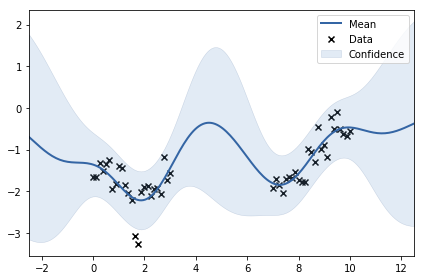

In [4]:
m_full = GPy.models.GPRegression(X,y)
m_full.optimize() # Optimize parameters of covariance function
m_full.plot() # plot the regression


Now we set up the inducing variables, $\mathbf{u}$. Each inducing variable has its own associated input index, $\mathbf{Z}$, which lives in the same space as $\inputMatrix$. Here we are using the true covariance function parameters to generate the fit.

In [6]:
kern = GPy.kern.RBF(1)
Z = np.hstack(
        (np.linspace(2.5,4.,3),
        np.linspace(7,8.5,3)))[:,None]
m = GPy.models.SparseGPRegression(X,y,kernel=kern,Z=Z)
m['.*noise'] = noise_var
m.inducing_inputs.constrain_fixed()
#m.tie_params('.*variance')
display(m)

sparse_gp.,value,constraints,priors
inducing inputs,"(6, 1)",fixed,
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,0.01,+ve,


 /Users/neil/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


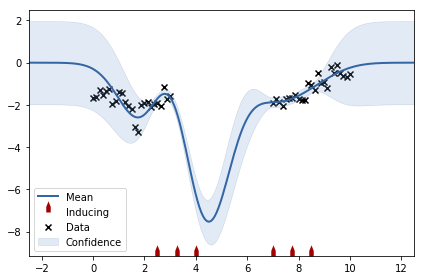

In [7]:
m.plot()

 /Users/neil/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


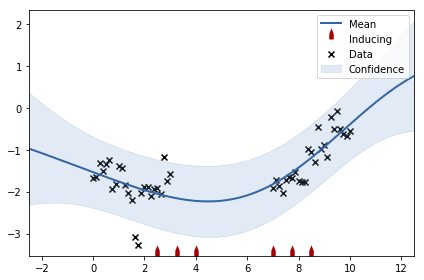

In [8]:
m.optimize()
m.plot()

In [9]:
display(m)

sparse_gp.,value,constraints,priors
inducing inputs,"(6, 1)",fixed,
rbf.variance,2.2953713932,+ve,
rbf.lengthscale,5.02424448063,+ve,
Gaussian_noise.variance,0.161886982205,+ve,


 /Users/neil/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


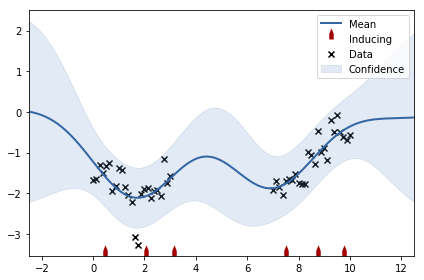

In [10]:
m.randomize()
m.inducing_inputs.unconstrain()
m.optimize()
m.plot()

Now we will vary the number of inducing points used to form the approximation. 

In [14]:
#m.randomize()
m.unconstrain('')
M = 8
m.num_inducing = M

m.Z = np.random.rand(M,1)*12

#m.ensure_default_constraints()
m.optimize()
m.plot()
m_full.plot()
print(m.log_likelihood(), m_full.log_likelihood())

AttributeError: 'numpy.ndarray' object has no attribute 'gradient'

In [16]:
import GPy
data = GPy.util.datasets.mauna_loa()
m = GPy.models.SparseGPRegression(data['X'],data['Y'])

m.inducing_inputs.constrain_fixed()
#m.tie_params('.*variance')
m.randomize()
m.inducing_inputs.unconstrain()
m.randomize()

Using cached version of the data set, to use latest version set refresh_data to True
Most recent data observation from month  10.0  in year  2017.0


 /Users/neil/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


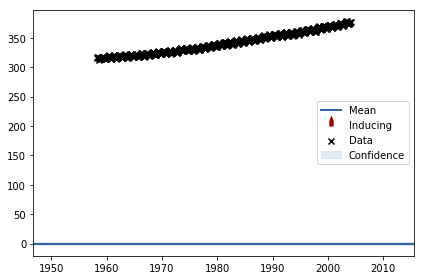

In [17]:
m.plot()

### Uncertainty about the Provenance of the Data

Provenance could include the time that the data was acquired, the location that the data was acquired, even the 'type' of data that is acquired. For example, in computer vision pixels are arriving from different objects. We are uncertain about the provenance of the pixels in terms of which *object* they are arriving from. The spatial location of the object in the image. This uncertainty relates to uncertainty about the covariance function. Unfortunately, it is not directly on the covariance function itself, but relates to values through which the covariance is nonlinearly related.

\begin{align*}
k(\dataVector, \dataVector^\prime) = \exp(-||\dataVector-\dataVector^\prime||^2)
\end{align*}

These variables become *latent* or *confounders*.

**Not sure about this**: Provenance of data is often finite. Consider a diseased person. That person consists of a finite (if very large) state vector. Of course the number of measurements we can make about that person is infinite. But there are a set of fundamental limitations to what can go wrong with the individual.

## Ethics

Ownership of data, returning it to the individual. In healthcare the danger of confusing it with marketing, Laplace, and the utopian view of data. Invalidity of insurance. How the results are presented to the patient. 

((*- extends 'my_article.tplx' -*))

((* block bibliography *))
\bibliographystyle{unsrt}
\bibliography{lawrence,other,zbooks}
((* endblock bibliography *))